# PROJECT -5 Mushroom Project

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder


In [102]:
df = pd.read_csv("mushroom.csv")
df.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


In [103]:
df.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises%3F', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat', 'class'],
      dtype='object')

In [104]:
df.shape

(8124, 23)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises%3F                8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [106]:
df.isnull().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises%3F                     0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
class                          0
dtype: int64

In [107]:
df['class'].unique()

array(['p', 'e'], dtype=object)

In [108]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

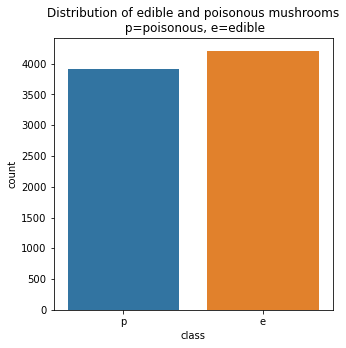

In [109]:
plt.figure(figsize=(5,5))
sns.countplot(df['class'])
plt.title("Distribution of edible and poisonous mushrooms\n p=poisonous, e=edible")
plt.show()

# Exploratory Data Analysis

In [110]:
cat_feature=['cap-shape', 'cap-surface', 'cap-color', 'bruises%3F', 'odor']

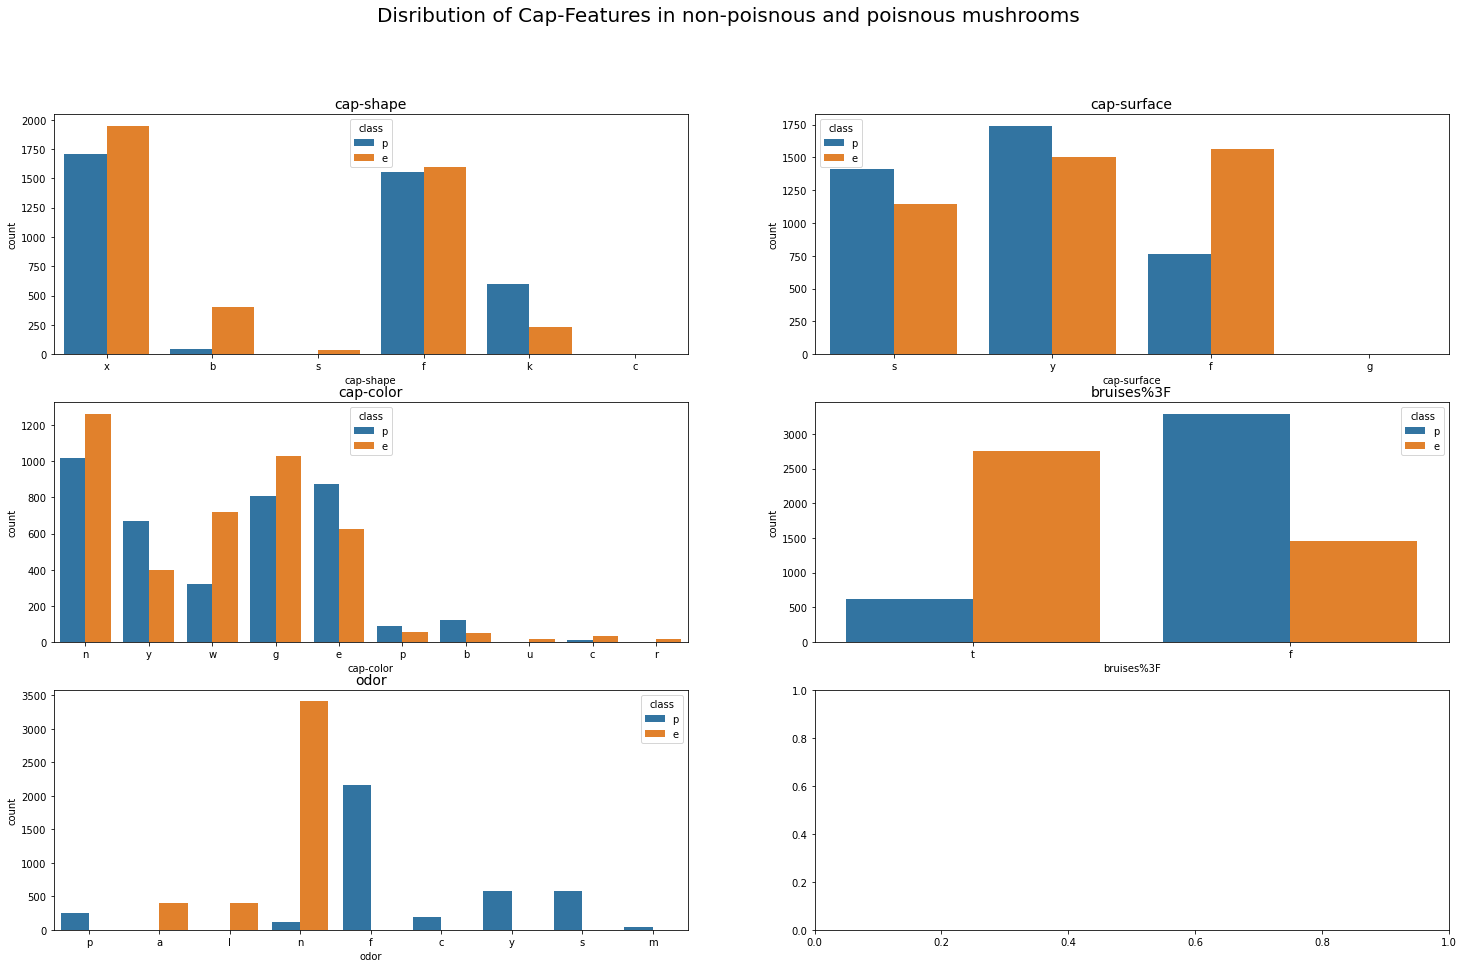

In [111]:
fig, ax=plt.subplots(3, 2, figsize=(25,15))
for i in range(5):
    sns.countplot(cat_feature[i], hue='class', data=df, ax=ax[i//2][i%2])
    ax[i//2][i%2].set_title(cat_feature[i], fontsize=14)
    
fig.suptitle("Disribution of Cap-Features in non-poisnous and poisnous mushrooms", fontsize=20)
plt.show()

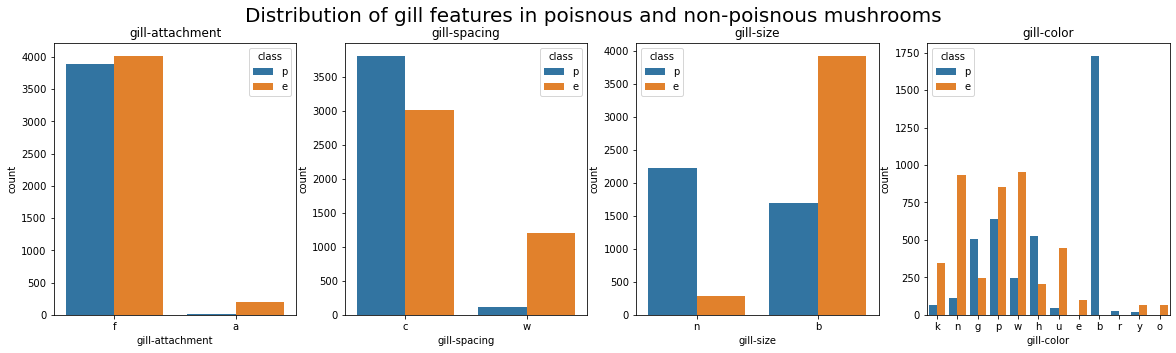

In [113]:
fig,ax=plt.subplots(1,4,figsize=(20,5))
sns.countplot('gill-attachment', hue='class', data=df, ax=ax[0])
ax[0].set_title('gill-attachment')

sns.countplot('gill-spacing', hue='class', data=df, ax=ax[1])
ax[1].set_title('gill-spacing')

sns.countplot('gill-size',hue='class', data=df, ax=ax[2])
ax[2].set_title('gill-size')

sns.countplot('gill-color',hue='class', data=df, ax=ax[3])
ax[3].set_title('gill-color')
fig.suptitle("Distribution of gill features in poisnous and non-poisnous mushrooms", fontsize=20)

plt.show()

In [114]:
features=['stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color']


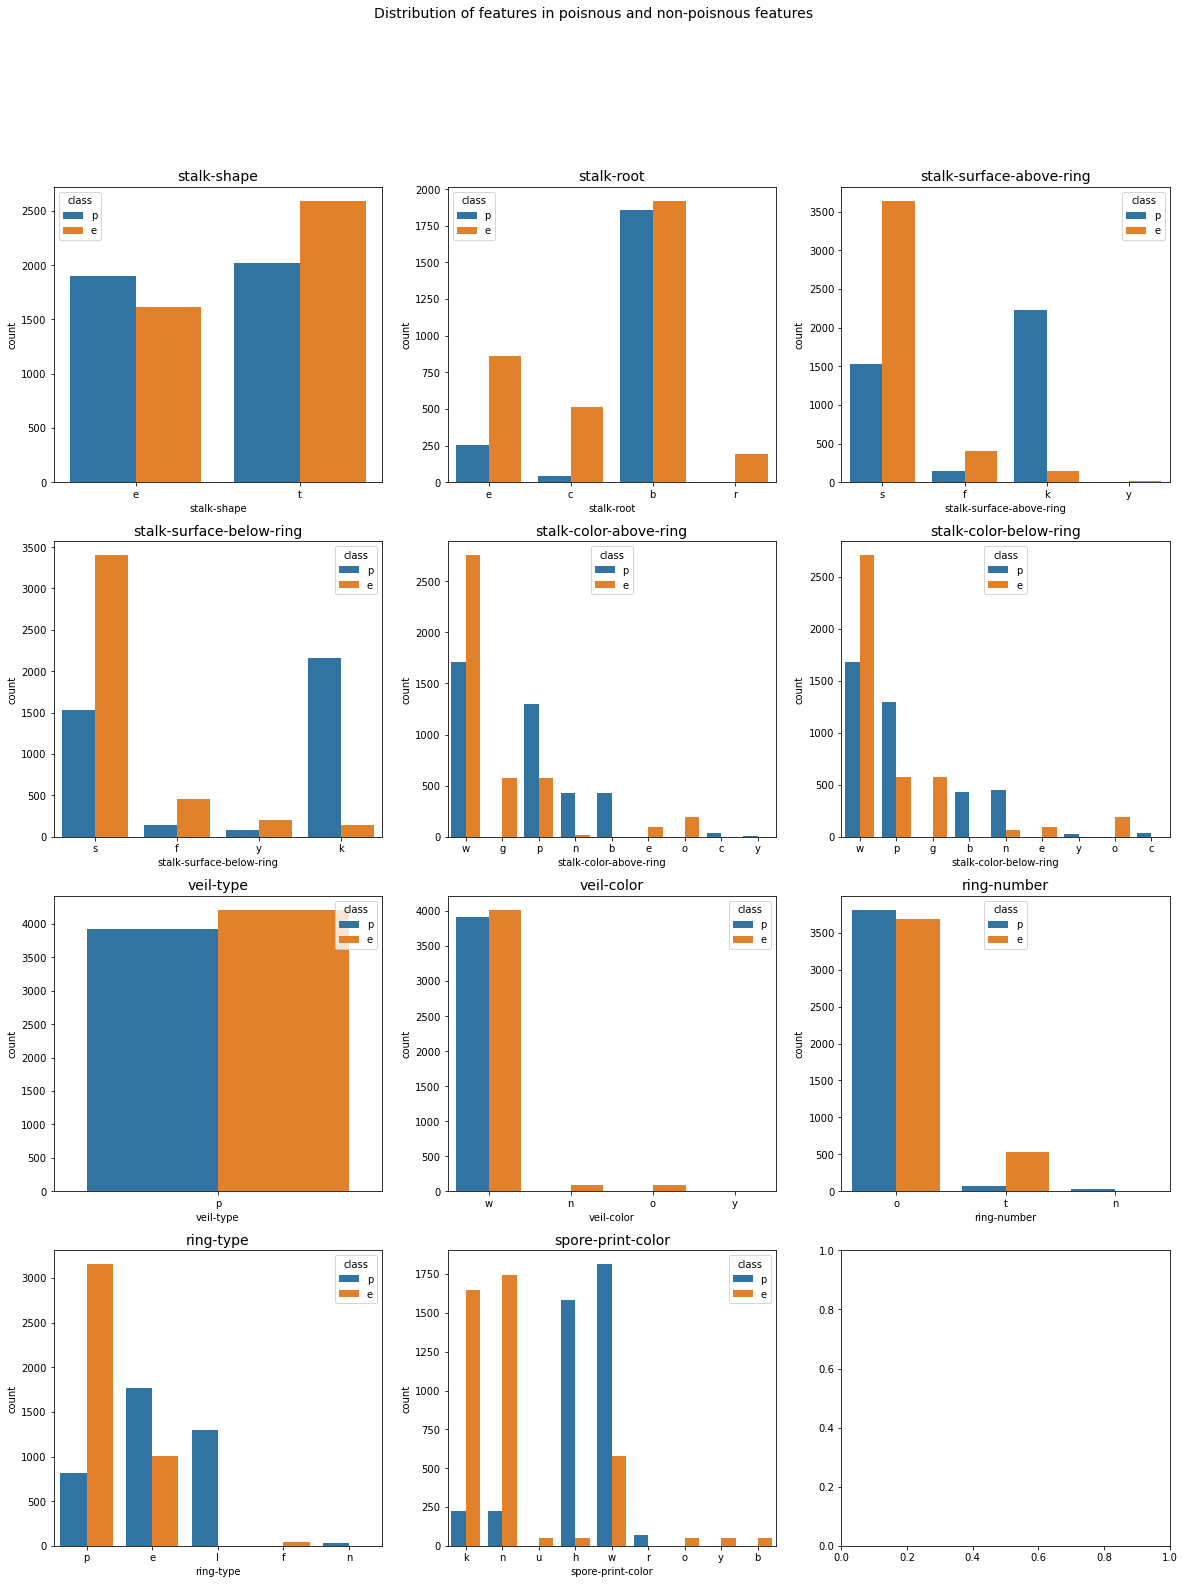

In [115]:
fig, ax=plt.subplots(4,3, figsize=(20,25))
for i in range(11):
    sns.countplot(features[i], hue='class',data=df, ax=ax[i//3][i%3])
    ax[i//3][i%3].set_title(features[i], fontsize=14)
plt.suptitle("Distribution of features in poisnous and non-poisnous features", fontsize=14)
plt.show()

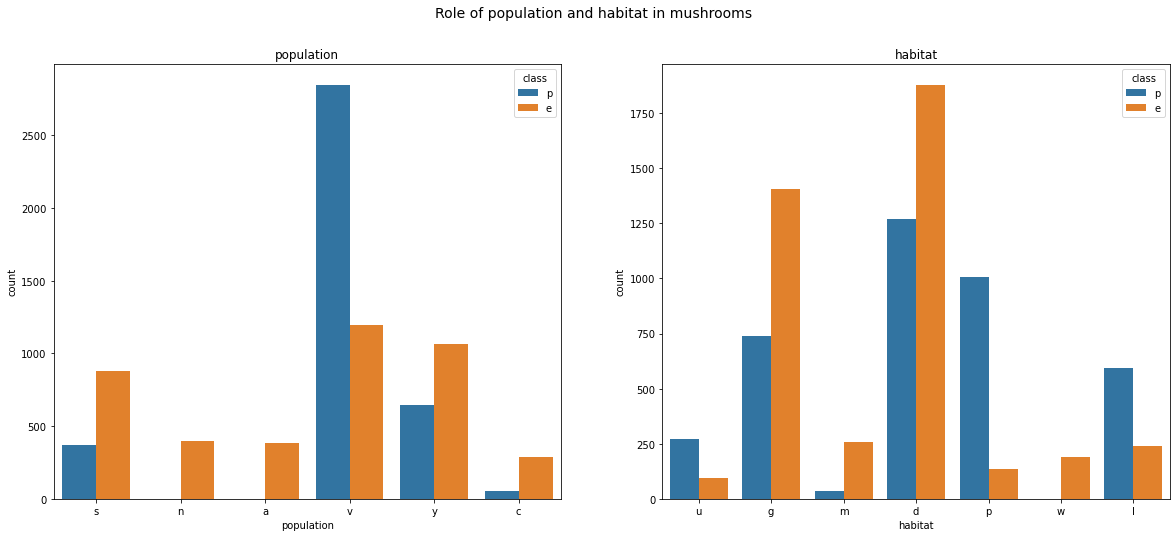

In [116]:
fig, ax=plt.subplots(1,2, figsize=(20,8))

sns.countplot('population', hue='class',data=df, ax=ax[0])
ax[0].set_title('population')

sns.countplot('habitat', hue='class', data=df, ax=ax[1])
ax[1].set_title('habitat')

plt.suptitle("Role of population and habitat in mushrooms", fontsize=14)
plt.show()

In [117]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [118]:
df.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises%3F', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat', 'class'],
      dtype='object')

In [119]:
df['stalk-root'].isnull().sum()

2480

In [120]:
df['stalk-root'].describe()

count     5644
unique       4
top          b
freq      3776
Name: stalk-root, dtype: object

In [124]:
#Dealing with Null value in stalk-root column as we see in df.info()
CV ="b"
df['stalk-root'] = df['stalk-root'].fillna(CV)
df.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises%3F                  0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
class                       0
dtype: int64

In [125]:
columns=df.columns.values
for column in columns:
    le=LabelEncoder()
    df[column]=le.fit_transform(df[column])
df.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,5,2,4,1,6,1,0,1,4,0,...,7,7,0,2,1,4,2,3,5,1
1,5,2,9,1,0,1,0,0,4,0,...,7,7,0,2,1,4,3,2,1,0
2,0,2,8,1,3,1,0,0,5,0,...,7,7,0,2,1,4,3,2,3,0
3,5,3,8,1,6,1,0,1,5,0,...,7,7,0,2,1,4,2,3,5,1
4,5,2,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,0,1,0


In [126]:
df.dtypes

cap-shape                   int32
cap-surface                 int32
cap-color                   int32
bruises%3F                  int32
odor                        int32
gill-attachment             int32
gill-spacing                int32
gill-size                   int32
gill-color                  int32
stalk-shape                 int32
stalk-root                  int32
stalk-surface-above-ring    int32
stalk-surface-below-ring    int32
stalk-color-above-ring      int32
stalk-color-below-ring      int32
veil-type                   int32
veil-color                  int32
ring-number                 int32
ring-type                   int32
spore-print-color           int32
population                  int32
habitat                     int32
class                       int32
dtype: object

In [127]:
df.sample()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
2122,2,0,4,1,5,1,0,0,7,1,...,3,6,0,2,1,4,2,4,0,0


In [128]:
dfcor = df.corr()
dfcor

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
cap-shape,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,0.063794,...,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221,0.052951
cap-surface,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,-0.014123,...,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887,0.178446
cap-color,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,-0.456496,...,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925,-0.031384
bruises%3F,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,0.099364,...,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095,-0.501530
odor,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,0.459766,...,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610,-0.093552
gill-attachment,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,0.186485,...,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304,0.129200
gill-spacing,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,0.080895,...,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680,-0.348387
gill-size,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,0.214576,...,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418,0.540024
gill-color,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,-0.175699,...,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972,-0.530566
stalk-shape,0.063794,-0.014123,-0.456496,0.099364,0.459766,0.186485,0.080895,0.214576,-0.175699,1.000000,...,0.223439,0.235794,NaN,0.162604,-0.293221,-0.291444,0.258831,0.087383,-0.269216,-0.102019


In [129]:
df['veil-type'].describe()

count    8124.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: veil-type, dtype: float64

In [130]:
df['veil-type'].unique()

array([0])

In [131]:
df.drop(['veil-type'], axis = 1, inplace = True)

In [132]:
df.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises%3F', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat', 'class'],
      dtype='object')

In [133]:
dfcor =df.corr()
dfcor

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
cap-shape,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,0.063794,...,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221,0.052951
cap-surface,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,-0.014123,...,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887,0.178446
cap-color,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,-0.456496,...,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925,-0.031384
bruises%3F,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,0.099364,...,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095,-0.501530
odor,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,0.459766,...,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610,-0.093552
gill-attachment,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,0.186485,...,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304,0.129200
gill-spacing,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,0.080895,...,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680,-0.348387
gill-size,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,0.214576,...,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418,0.540024
gill-color,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,-0.175699,...,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972,-0.530566
stalk-shape,0.063794,-0.014123,-0.456496,0.099364,0.459766,0.186485,0.080895,0.214576,-0.175699,1.000000,...,-0.034399,0.223439,0.235794,0.162604,-0.293221,-0.291444,0.258831,0.087383,-0.269216,-0.102019


In [134]:
df.isnull().values.any()

False

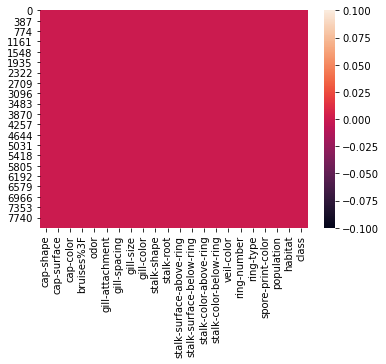

In [135]:
sns.heatmap(df.isnull())

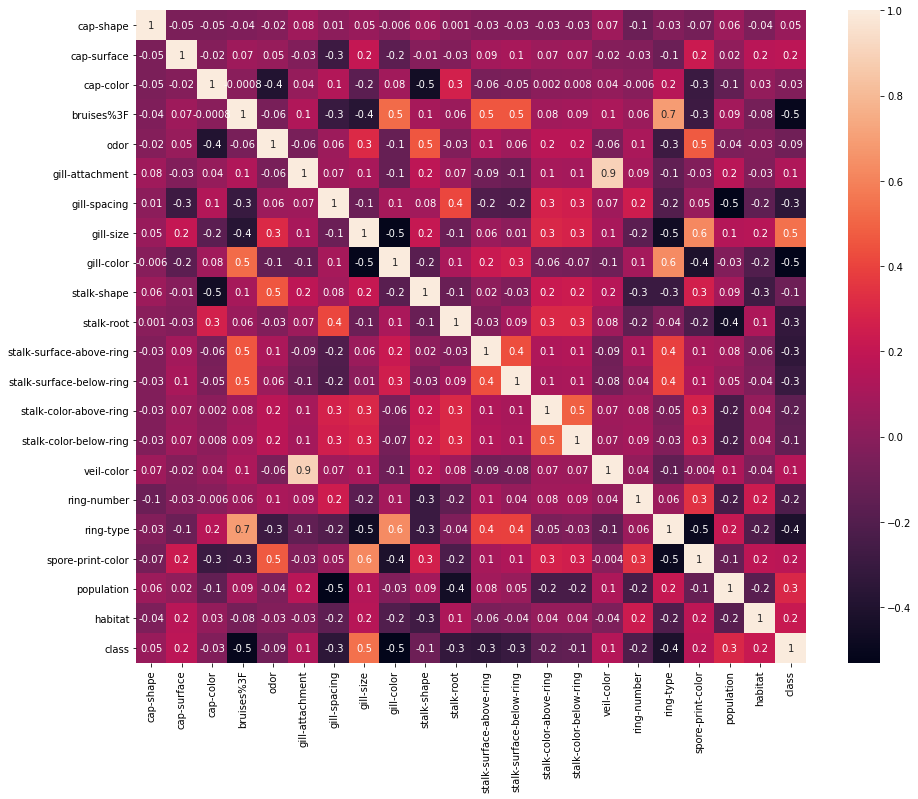

In [136]:
plt.figure(figsize=(15,12))
sns.heatmap(dfcor,annot=True , fmt = '.1g')

As per heatmap we can see that bruises%3F , gill-spacing , gill-color and ring-type behaving negtively in the data set.

gil-size, cap-surface, population columns are behaaving positively in the dataset.

In [138]:
df1 = pd.read_csv("mushroom.csv")
df1.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises%3F', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat', 'class'],
      dtype='object')

In [139]:
df.describe()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,...,1.603644,5.816347,5.794682,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616,0.482029
std,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,...,0.675974,1.901747,1.907291,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975,0.499708
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,...,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000,0.000000
50%,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,...,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000,0.000000
75%,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,...,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000,1.000000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,...,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000,1.000000


In [159]:
collist = df.columns.values
ncol=36
nrows=30


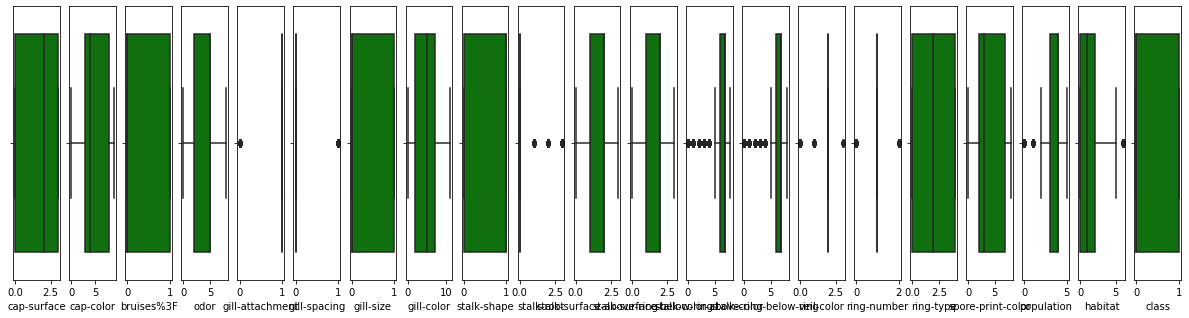

In [170]:
plt.figure(figsize = (ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color ='green',orient='h')
    

We can see there are some outliers present in around 3 columns

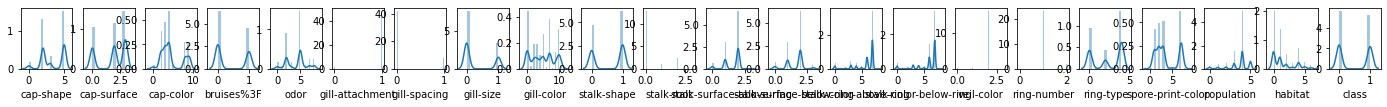

In [172]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize = (40,40))

for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

Skewness is Present in almost all columns

# Data Cleaning

In [176]:
from scipy.stats import zscore
z= np.abs(zscore(df))
threshold =3
np.where(z>3)

(array([  33,   41,   48, ..., 8121, 8123, 8123], dtype=int64),
 array([10, 10, 10, ..., 15,  5, 15], dtype=int64))

In [177]:
m = df[(z<3).all(axis=1)]
m

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,2,1,4,2,3,5,1
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,2,1,4,3,2,1,0
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,2,1,4,3,2,3,0
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,2,1,4,2,3,5,1
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,2,1,0,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8113,3,3,2,0,8,1,0,1,0,1,...,1,6,6,2,1,0,7,4,0,1
8116,3,3,4,0,7,1,0,1,0,1,...,1,6,7,2,1,0,7,4,2,1
8117,3,2,2,0,8,1,0,1,0,1,...,2,6,7,2,1,0,7,4,0,1
8118,3,3,4,0,2,1,0,1,0,1,...,2,6,7,2,1,0,7,4,0,1


In [179]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [180]:
pca = PCA(n_components = 10)

In [181]:
df.shape

(8124, 22)

In [183]:
#Percentage Loss of data after removing outliers
percentage_loss=((8124-6376)/8124)*100
percentage_loss

21.516494337764648

In [184]:
#IQR Method

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

cap-shape                   3.0
cap-surface                 3.0
cap-color                   5.0
bruises%3F                  1.0
odor                        3.0
gill-attachment             0.0
gill-spacing                0.0
gill-size                   1.0
gill-color                  5.0
stalk-shape                 1.0
stalk-root                  0.0
stalk-surface-above-ring    1.0
stalk-surface-below-ring    1.0
stalk-color-above-ring      1.0
stalk-color-below-ring      1.0
veil-color                  0.0
ring-number                 0.0
ring-type                   4.0
spore-print-color           5.0
population                  1.0
habitat                     2.0
class                       1.0
dtype: float64


In [186]:
df_new1 = df[~((df<(Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]
print(df_new1.shape)

(3088, 22)


Data Loss is high so i will not delete outliers but i  am also confused what will be the step then.

In [187]:
x= df.iloc[:,0:-1]
x.shape


(8124, 21)

In [188]:
#Removing skewness
from sklearn.preprocessing import power_transform
x = power_transform(x,method = 'yeo-johnson')

In [189]:
x.shape

(8124, 21)

In [198]:
df.shape

(8124, 22)

In [199]:
y = df['class']

In [202]:
x = df.drop("class",axis=1)
x

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,2,5,5,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,2,5,5,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,2,5,5,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,2,1,7,7,2,1,0,7,4,2


In [200]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32

In [203]:
x= pca.fit_transform(x)

In [204]:
x.shape

(8124, 10)

In [205]:
from sklearn.preprocessing import StandardScaler

In [206]:
scale = StandardScaler()

In [207]:
x = scale.fit_transform(x)

In [208]:
y.shape

(8124,)

In [210]:
y=y.values.reshape(-1,1)
y.shape

(8124, 1)

In [212]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaledX = sc.fit_transform(x)

In [213]:
#Finding Best Random State

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

best_rstate=0
accu=0

for i in range(30,200):
    x_train,x_test,y_train,y_test = train_test_split(scaledX,y,test_size = .25,random_state=i)
    mod = LinearRegression()
    mod.fit(x_train,y_train)
    y_pred = mod.predict(x_test)
    tempaccu = r2_score(y_test,y_pred)
    
    if tempaccu>accu:
        accu = tempaccu
        best_rstate = i
        
        
        
print(f"Best Accuracy {accu*100} found on random_state {best_rstate}")
    



Best Accuracy 44.600038863496 found on random_state 147


In [218]:
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size =.22,random_state =147)

In [219]:
y_train.shape

(6336, 1)

In [220]:
x_train.shape

(6336, 10)

In [221]:
lr = LogisticRegression()

In [222]:
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr = lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8394854586129754
[[792 127]
 [160 709]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       919
           1       0.85      0.82      0.83       869

    accuracy                           0.84      1788
   macro avg       0.84      0.84      0.84      1788
weighted avg       0.84      0.84      0.84      1788



In [224]:
df['class'].unique()

array([1, 0])

In [225]:
gnb = GaussianNB()

In [226]:
gnb.fit(x_train, y_train)
gnb.score(x_train,y_train)
predgnb = gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))


0.8624161073825504
[[832  87]
 [159 710]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       919
           1       0.89      0.82      0.85       869

    accuracy                           0.86      1788
   macro avg       0.87      0.86      0.86      1788
weighted avg       0.86      0.86      0.86      1788



In [227]:
svc = SVC()

In [228]:
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))


0.9921700223713646
[[915   4]
 [ 10 859]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       919
           1       1.00      0.99      0.99       869

    accuracy                           0.99      1788
   macro avg       0.99      0.99      0.99      1788
weighted avg       0.99      0.99      0.99      1788



In [229]:
dt = DecisionTreeClassifier()

In [230]:
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
preddt = dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))


0.988255033557047
[[904  15]
 [  6 863]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       919
           1       0.98      0.99      0.99       869

    accuracy                           0.99      1788
   macro avg       0.99      0.99      0.99      1788
weighted avg       0.99      0.99      0.99      1788



# CROSS VALIDATION

In [231]:
from sklearn.model_selection import cross_val_score

gnbscores = cross_val_score(gnb,x,y,cv=5)
print(gnbscores)
print(gnbscores.mean(),gnbscores.std())

[0.47815385 0.64369231 0.66092308 0.77353846 0.72413793]
0.656089124668435 0.1002626533507436


In [232]:
svcscores = cross_val_score(svc,x,y,cv=5)
print(svcscores)
print(svcscores.mean(),svcscores.std())

[0.82276923 0.99815385 0.90030769 1.         0.58805419]
0.8618569912845775 0.15207538161344292


In [233]:
dtscores = cross_val_score(dt,x,y,cv=5)
print(dtscores)
print(dtscores.mean(),dtscores.std())

[0.83138462 0.97846154 0.94338462 1.         0.65394089]
0.8814343311860553 0.12772484160993816


# Saving The Model

In [234]:
 import joblib

In [238]:
joblib.dump(svc,'svcfile.obj')

['svcfile.obj']

In [239]:
svc_from_joblib = joblib.load('svcfile.obj')

In [240]:
svc_from_joblib.predict(x_test)

array([1, 0, 0, ..., 0, 0, 1])

END OF PROJECT